In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
!pip install scikit-learn
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("train.txt", sep="\t")
data.head(5)

,id,turn1,turn2,turn3,label
0,0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others
1,1,When did I?,saw many times i think -_-,No. I never saw you,angry
2,2,By,by Google Chrome,Where you live,others
3,3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry
4,4,Just for time pass,wt do u do 4 a living then,Maybe,others


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30160 entries, 0 to 30159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30160 non-null  int64 
 1   turn1   30157 non-null  object
 2   turn2   30160 non-null  object
 3   turn3   30160 non-null  object
 4   label   30160 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


<ipython-input-33-690054ebd2a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


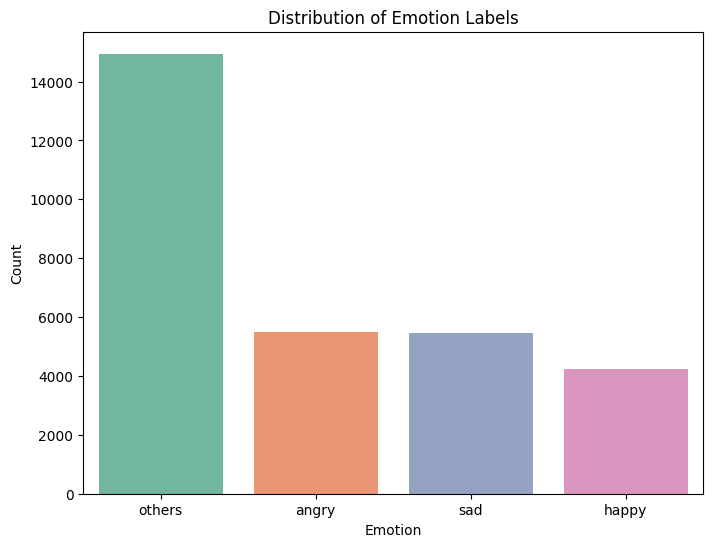

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [ ]:

data['Word_count1'] = data['turn1'].apply(lambda x: len(str(x).split()))
data['Word_count2'] = data['turn2'].apply(lambda x: len(str(x).split()))
data['Word_count3'] = data['turn3'].apply(lambda x: len(str(x).split()))


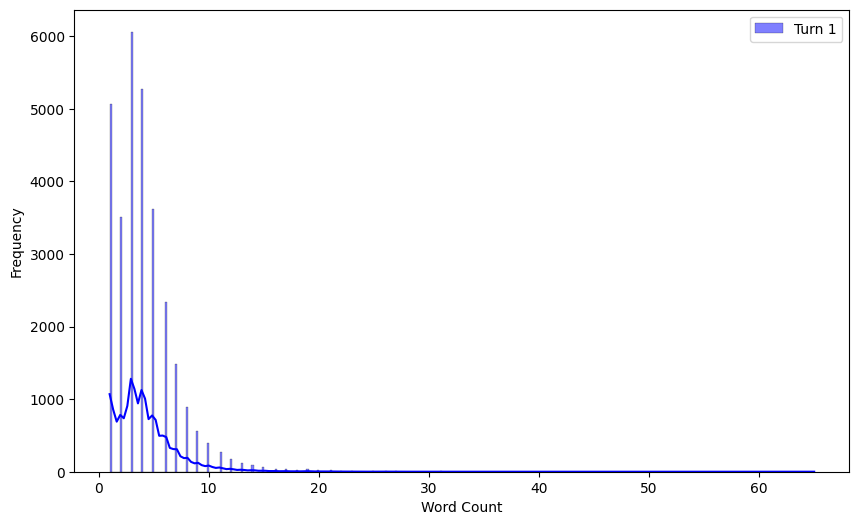

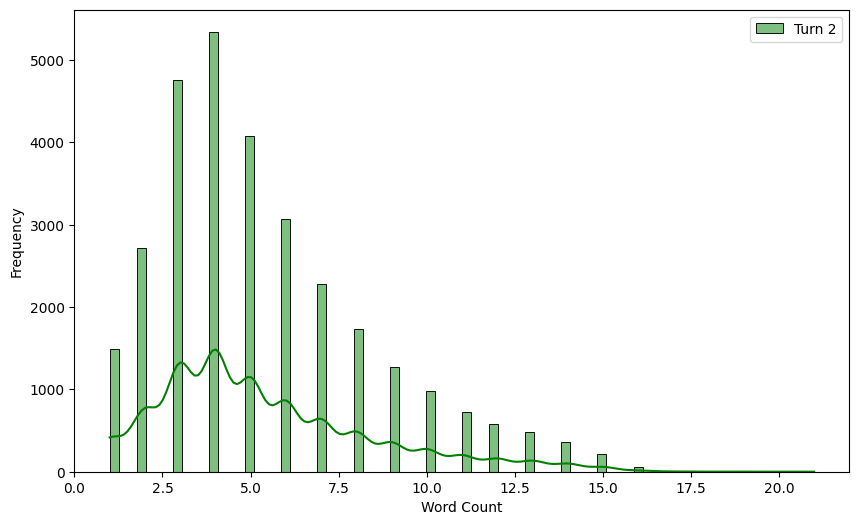

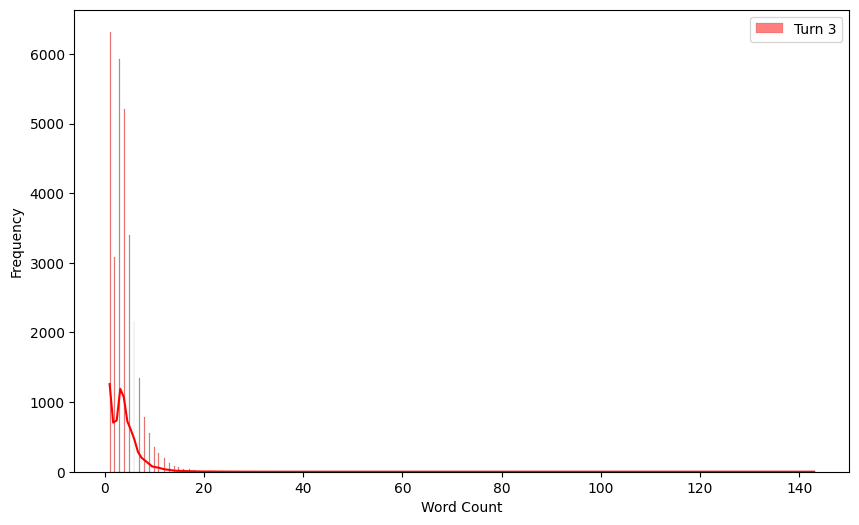

In [ ]:
for i, color in zip(range(1, 4), ['blue', 'green', 'red']):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[f'Word_count{i}'], kde=True, color=color, label=f'Turn {i}')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
df = data.copy()
df.drop(columns=["id"], inplace=True)
df = df[
    (df['Word_count1'] <= df['Word_count1'].quantile(0.95)) &
    (df['Word_count2'] <= df['Word_count2'].quantile(0.95)) &
    (df['Word_count3'] <= df['Word_count3'].quantile(0.95))
]
df.drop(columns=["Word_count1", "Word_count2", "Word_count3"], inplace=True)

<ipython-input-37-b98da8dbbc42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Word_count1", "Word_count2", "Word_count3"], inplace=True)


In [ ]:
df["convo"] = df["turn1"] + " " + df["turn2"] + " " + df["turn3"]
df["convo"] = df["convo"].apply(lambda x: str(x).lower() if isinstance(x, str) else "")


In [ ]:
X = df["convo"]
y = df["label"]
vec = TfidfVectorizer(stop_words="english")
encoder = LabelEncoder()
X_vec = vec.fit_transform(X).toarray()
y_encoded = encoder.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_vec, y_encoded, test_size=0.2, random_state=33)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32)

Epoch 1/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 90s 133ms/step - accuracy: 0.6388 - loss: 0.9275 - val_accuracy: 0.7642 - val_loss: 0.6655
Epoch 2/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 62s 92ms/step - accuracy: 0.8396 - loss: 0.4675 - val_accuracy: 0.7532 - val_loss: 0.7059
Epoch 3/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.8849 - loss: 0.3380 - val_accuracy: 0.7407 - val_loss: 0.7865
Epoch 4/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.9213 - loss: 0.2363 - val_accuracy: 0.7373 - val_loss: 0.8654
Epoch 5/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 72s 81ms/step - accuracy: 0.9411 - loss: 0.1722 - val_accuracy: 0.7233 - val_loss: 1.0212
Epoch 6/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9590 - loss: 0.1192 - val_accuracy: 0.7306 - val_loss: 1.1223
Epoch 7/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.9703 - loss: 0.0873 - val_accuracy: 0.7259 - val_loss: 1.2082
Epoch 8/10
669/669 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9753 - loss: 0.0713 -

In [ ]:
y_pred = model.predict(x_test).argmax(axis=1)
accuracy = tf.keras.metrics.Accuracy()(y_test, y_pred).numpy()
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Deep Learning Model Accuracy: 0.7164


In [ ]:
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       angry       0.79      0.73      0.76       917
       happy       0.60      0.52      0.56       784
      others       0.75      0.80      0.77      2694
         sad       0.64      0.62      0.63       957

    accuracy                           0.72      5352
   macro avg       0.69      0.67      0.68      5352
weighted avg       0.71      0.72      0.71      5352

